## Marco Teórico: Conceptos Clave para el Caso Castellví

### 1. Definición de EWE (Extreme Wildfire Event)
Según **Tedim et al. (2018)**, un EWE se caracteriza por un comportamiento del fuego que excede la capacidad de control, a menudo involucrando interacciones atmósfera-fuego.
* **Aplicación al caso:** El reporte menciona "comportamiento errático" y formación de pirocúmulos (PyroCu), lo que clasifica este evento como extremo/convectivo.

### 2. Acoplamiento Fuego-Atmósfera
La teoría distingue entre dos regímenes principales (**Byram, 1959**):
* **Wind-Driven (Impulsado por el viento):** La inclinación de la columna depende de la velocidad del viento ambiental. (Fase inicial del incendio).
* **Plume-Dominated (Dominado por el penacho):** La potencia del fuego ($P_f$) supera a la del viento ($P_w$). Se genera una columna vertical fuerte y su propia meteorología. (Fase del pirocúmulo en Castellví).

### 3. Cizalladura del Viento (Wind Shear)
El cambio de dirección del viento con la altura es crítico. Según la literatura, una cizalladura fuerte favorece la vorticidad y el comportamiento impredecible.
* **Evidencia:** Nuestro radiosondeo muestra vientos del SE en superficie (0-500m) y del NO en altura (>2000m).

### 4. Mecanismo de Spotting (Focos Secundarios)
El transporte de pavesas (**Albini, 1979**) permite al fuego saltar discontinuidades.
* **Dato:** Se reportaron focos secundarios a 500m, lo que implica una columna convectiva lo suficientemente fuerte para elevar partículas grandes.

In [4]:
import cdsapi
import pandas as pd
import matplotlib.pyplot as plt
import os
import numpy as np

# Configuración de estilo para gráficos profesionales
plt.style.use('seaborn-v0_8-whitegrid')

# Directorios
output_dir = 'C:/Datos_Incendio/'
if not os.path.exists(output_dir):
    os.makedirs(output_dir)
    print(f"Directorio creado: {output_dir}")
else:
    print(f"Directorio de trabajo: {output_dir}")

Directorio de trabajo: C:/Datos_Incendio/


In [5]:
# Credenciales (Ya configuradas en tu sistema o pegadas aquí)
URL = "https://cds.climate.copernicus.eu/api"
KEY = "0eb02b66-9b33-47e7-b99a-b715c0524409" # Tu clave

grib_file = os.path.join(output_dir, 'era5_castellvi.grib')

if not os.path.exists(grib_file):
    print("Iniciando descarga de ERA5 (GRIB)...")
    c = cdsapi.Client(url=URL, key=KEY)
    try:
        c.retrieve(
            'reanalysis-era5-single-levels',
            {
                'product_type': 'reanalysis',
                'format': 'grib',  # GRIB es nativo para QGIS
                'variable': [
                    '2m_temperature', '10m_u_component_of_wind', 
                    '10m_v_component_of_wind', 'boundary_layer_height'
                ],
                'year': '2021', 'month': '07', 'day': ['13'],
                'time': ['12:00', '13:00', '14:00', '15:00', '16:00', '17:00'], # Horas clave
                'area': [41.7, 1.6, 41.2, 2.2], # [N, W, S, E]
            },
            grib_file)
        print("✅ Descarga completada.")
    except Exception as e:
        print(f"❌ Error en descarga: {e}")
else:
    print("✅ El archivo ERA5 ya existe.")

✅ El archivo ERA5 ya existe.


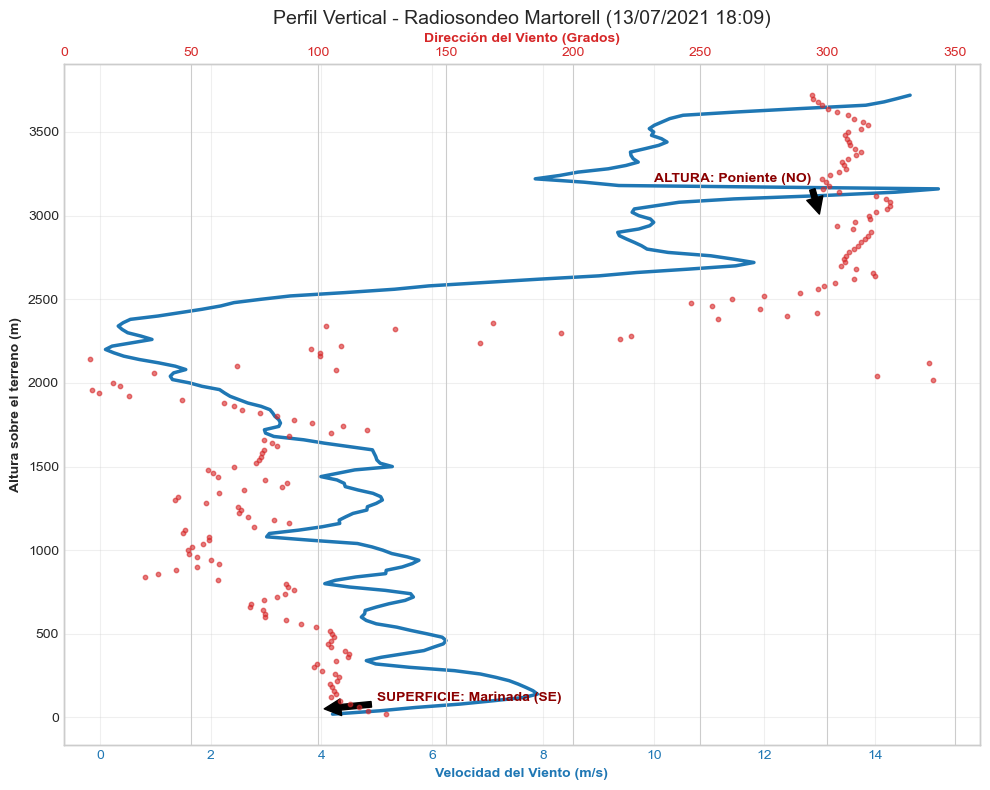

In [6]:
# Ruta al archivo de texto con los datos del sondeo
sonda_file = 'datos_sonda.txt' # O la ruta donde guardaste el texto que te pasé

try:
    # Cargar datos saltando encabezados
    df = pd.read_csv(sonda_file, skiprows=1, skipinitialspace=True)
    df.columns = [c.strip() for c in df.columns] # Limpiar nombres

    # Variables
    altura = df['Height (m AGL)']
    velocidad = df['Wind speed (m/s)']
    direccion = df['Wind direction (true deg)']

    # --- GENERACIÓN DEL GRÁFICO ---
    fig, ax1 = plt.subplots(figsize=(10, 8))

    # Eje 1: Velocidad (Línea Azul)
    color = 'tab:blue'
    ax1.set_xlabel('Velocidad del Viento (m/s)', color=color, fontweight='bold')
    ax1.set_ylabel('Altura sobre el terreno (m)', fontweight='bold')
    ax1.plot(velocidad, altura, color=color, linewidth=2.5, label='Velocidad')
    ax1.tick_params(axis='x', labelcolor=color)
    ax1.grid(True, alpha=0.3)

    # Eje 2: Dirección (Puntos Rojos)
    ax2 = ax1.twiny()
    color = 'tab:red'
    ax2.set_xlabel('Dirección del Viento (Grados)', color=color, fontweight='bold')
    ax2.scatter(direccion, altura, color=color, s=10, alpha=0.6, label='Dirección')
    ax2.tick_params(axis='x', labelcolor=color)
    ax2.set_xlim(0, 360)

    # Anotaciones interpretativas
    ax1.annotate('SUPERFICIE: Marinada (SE)', xy=(4, 50), xytext=(5, 100),
                 arrowprops=dict(facecolor='black', shrink=0.05), fontsize=10, fontweight='bold', color='darkred')
    
    ax1.annotate('ALTURA: Poniente (NO)', xy=(13, 3000), xytext=(10, 3200),
                 arrowprops=dict(facecolor='black', shrink=0.05), fontsize=10, fontweight='bold', color='darkred')

    plt.title('Perfil Vertical - Radiosondeo Martorell (13/07/2021 18:09)', fontsize=14)
    plt.tight_layout()
    plt.show()

except Exception as e:
    print(f"No se pudo generar el gráfico. Revisa que '{sonda_file}' exista. Error: {e}")

### Ficha Técnica del Incendio (Extraída de Reporte Bombers)

| Parámetro | Valor | Notas |
| :--- | :--- | :--- |
| **Inicio** | 13/07/2021 16:15 | Hora local |
| **Superficie** | 197 ha | Objetivo de validación |
| **ROS Promedio** | 700 m/h | Velocidad de propagación |
| **Comportamiento** | Convectivo / Pirocúmulo | Choque de vientos (Marinada vs Poniente) |
| **Spotting** | Distancias de 500m | Focos secundarios observados |